# What is The Perceptron?

## Introduction  
The perceptron is one of the earliest attempts at artificial neural networks, introduced by Frank Rosenblatt in 1958. It’s basic, but it was a breakthrough, designed to mimic the way the human brain works. At its core, it’s a binary classifier—just a simple system that decides whether something belongs to one class or another. While primitive by today’s standards, it laid the foundation for the much more advanced neural networks that followed.

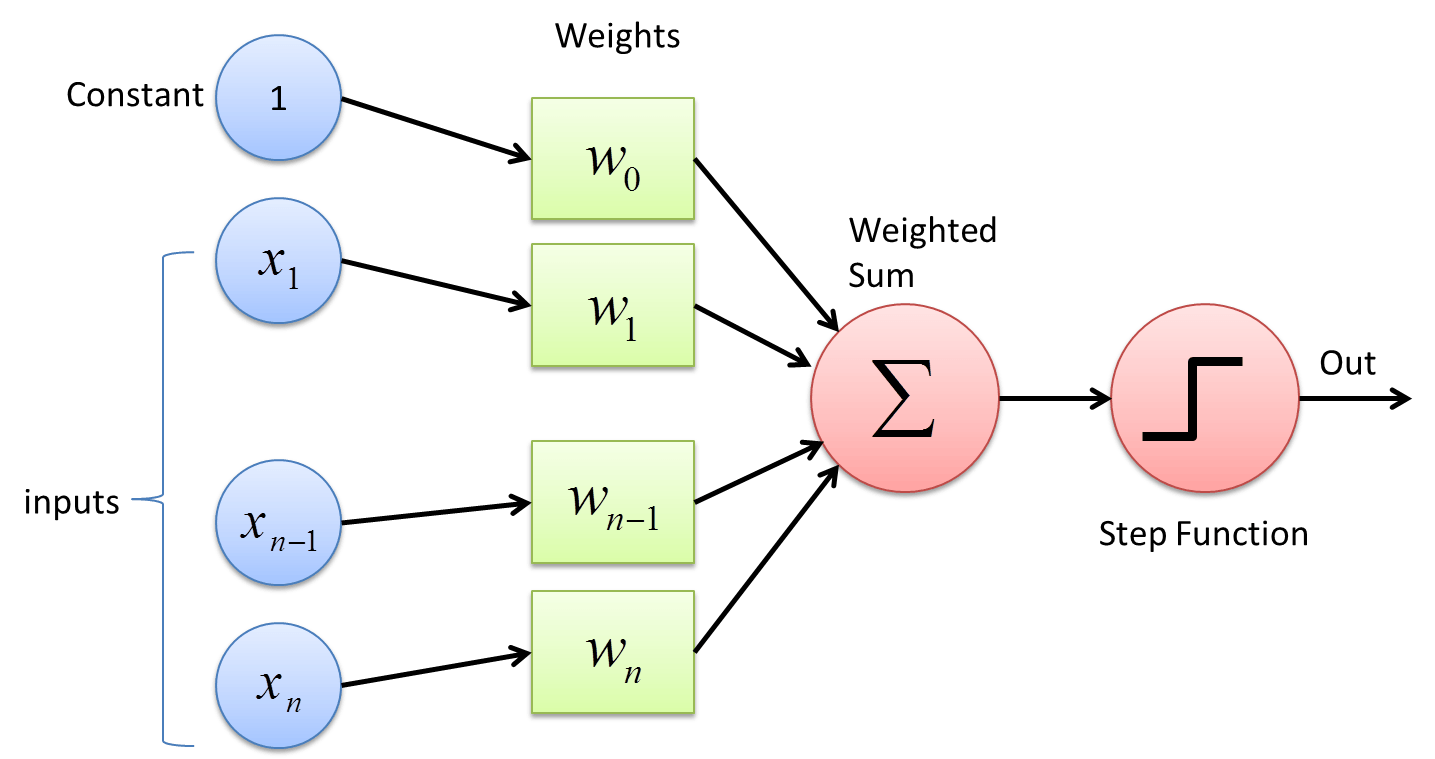

## How Does the Perceptron Work?  
The perceptron takes in multiple inputs, applies weights to each, and adds them up. Then, it runs that sum through an activation function (usually a step function) to get the output—either 0 or 1. Think of it like a neuron in the brain: if the signal is strong enough, the neuron “fires,” otherwise, it stays quiet.

The main action in a perceptron is:

output = activation(weighted_sum(inputs))


## Perceptron Architecture  
The perceptron is as basic as it gets—just a single neuron with no hidden layers. It takes in the inputs and spits out a classification. That’s it. No complexity, no frills.

## The Learning Rule  
The perceptron learns by adjusting its weights based on the errors it makes. After each prediction, it checks whether it got it right. If not, it tweaks the weights to correct the mistake. The rule for updating weights looks like this:

w = w + learning_rate * (actual - predicted) * input


This process continues with each example, gradually improving the perceptron’s accuracy over time.

## Limitations of a Single-Layer Perceptron  
The perceptron is a good start, but it has major flaws. The biggest one? It can only solve linearly separable problems. That means if the data isn’t separated by a straight line (like the XOR problem), the perceptron fails miserably. To fix this, multi-layer perceptrons (deep neural networks) came into play, enabling the model to handle much more complex patterns.



# Implementation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)

df = df.drop(columns=['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_balanced, y_train_balanced)

y_pred_perceptron = perceptron.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Classification Report:\n", classification_report(y_test, y_pred_perceptron))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.94815
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18297
           1       0.70      0.68      0.69      1703

    accuracy                           0.95     20000
   macro avg       0.84      0.83      0.83     20000
weighted avg       0.95      0.95      0.95     20000



# Visualizing Results

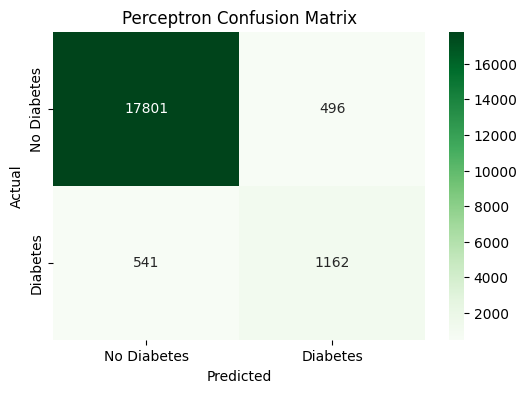

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_perceptron)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Perceptron Confusion Matrix')
plt.show()


This is model is not a great classifier for finding people with diabetes (only 68.23% accuracy), but it is impressive considering that this is the one of the most primative machine learning models



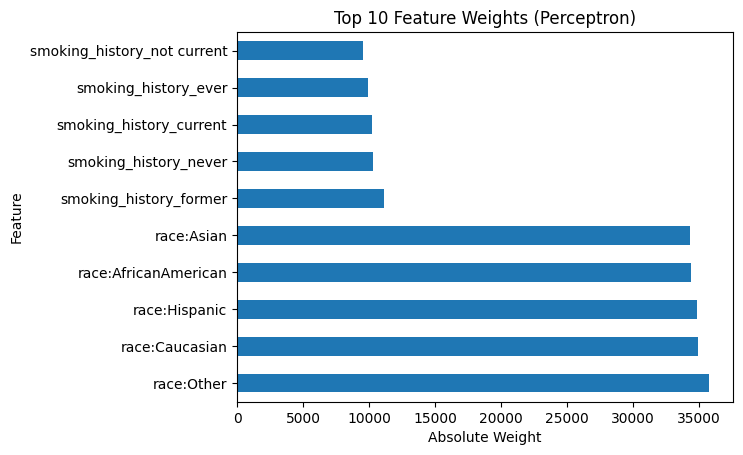

In [ ]:
import numpy as np
feature_weights = pd.Series(np.abs(perceptron.coef_[0]), index=X.columns)
feature_weights.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Weights (Perceptron)')
plt.xlabel('Absolute Weight')
plt.ylabel('Feature')
plt.show()

The feature weights demonstrate which features are most important to this model in making predictions. We can see that the most important predictors are race based. This is surprising. We do see that there are features that are more often linked with diabetes risk such as smoking characteristics.
